<a href="https://colab.research.google.com/github/KardelenBayraktar/MEOWLENS-AI/blob/main/cat_identifieer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
import os
import zipfile

# Google Drive'ı bağla
drive.mount('/content/drive')

# Zip dosyasını çıkar
zip_path = "/content/drive/My Drive/Colab Notebooks/archive.zip"  # Zip dosyasının tam yolu
extract_path = "/content"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Çıkarılan dosyaların konumunu kontrol et
os.listdir(extract_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['.config', 'cat_v1', 'drive', 'sample_data']

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/cat_v1',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('/content/cat_v1',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='categorical')

Found 951 images belonging to 5 classes.
Found 951 images belonging to 5 classes.


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(training_set.class_indices), activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(training_set,
                    epochs=10,
                    validation_data=test_set)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - accuracy: 0.6278 - loss: 0.9486 - val_accuracy: 0.6446 - val_loss: 0.8953
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - accuracy: 0.6405 - loss: 0.9460 - val_accuracy: 0.6719 - val_loss: 0.8735
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 169s 4s/step - accuracy: 0.6695 - loss: 0.8876 - val_accuracy: 0.5952 - val_loss: 1.0718
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.6744 - loss: 0.8424 - val_accuracy: 0.6225 - val_loss: 0.9786
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.6761 - loss: 0.8428 - val_accuracy: 0.6677 - val_loss: 0.8433
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.7185 - loss: 0.7622 - val_accuracy: 0.7403 - val_loss: 0.6759
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.7059 - loss: 0.7382 - val_accuracy: 0.7455 - val_loss: 0.6784
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step - accuracy: 0.7352 - loss: 0.6904 - val_accuracy: 0.8076 - v

30/30 - 52s - 2s/step - accuracy: 0.7024 - loss: 0.7810


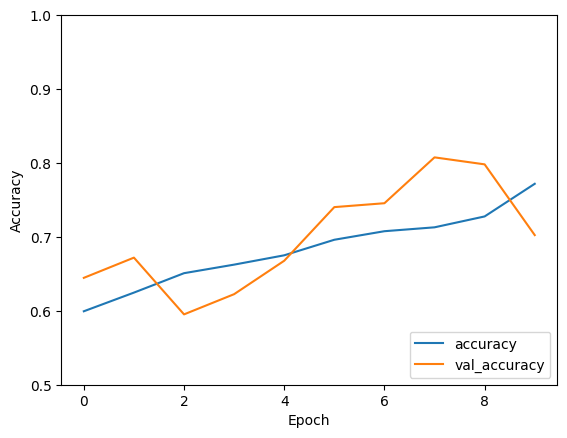

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_set, verbose=2)

In [16]:
model.save('kedi_turu_tanima_modeli.keras')  # .keras uzantısıyla kaydedin


In [17]:
!pip install bing-image-downloader

In [19]:
from tensorflow import keras

yuklenen_model = keras.models.load_model('kedi_turu_tanima_modeli.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [20]:
from bing_image_downloader import downloader

def google_gorsellerden_indir(arama_terimi, indirme_sayisi, klasor_adi):
  downloader.download(arama_terimi, limit=indirme_sayisi,  output_dir='kedi_resimleri', adult_filter_off=True, force_replace=False)  # 'kedi_resimleri' klasörüne indirir

google_gorsellerden_indir("Bengal kedisi", 50, "Bengal")
google_gorsellerden_indir("Domestic Shorthair kedisi", 50, "DomesticShorthair")
google_gorsellerden_indir("Maine Coon kedisi", 50, "MaineCoon")
google_gorsellerden_indir("Ragdoll kedisi", 50, "Ragdoll")
google_gorsellerden_indir("Siamese kedisi", 50, "Siamese")

[%] Downloading Images to /content/kedi_resimleri/Bengal kedisi


[!!]Indexing page: 1

[%] Indexed 95 Images on Page 1.


[%] Downloading Image #1 from http://bengalbengie.com/wp-content/uploads/2020/02/IMG_20200104_132807-scaled.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://listelist.com/wp-content/uploads/2021/02/bengal-kedisi-ozellikleri-karakteri-bakimi-listelist.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/11/d9/85/11d9852701084130b3f401c2ced9b7b4.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.mihavmarket.com.tr/uploads/24273973bengal-kedisi-ozellikleri-bakimi-tarihcesi-2.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://blog.petibom.com/wp-content/uploads/2021/09/bengal-kedi-yavrusu-1.jpg
[!] Issue getting: https://blog.petibom.com/wp-content/uploads/2021/09/bengal-kedi-yavrusu-1.jpg
[!] Error:: HTTP Error 403: Forbidden
[%] Downloading Image #5 from http://i2.wp.com/www.kedi9.com/

In [21]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np

# Modelinizi yükleyin (daha önce kaydettiğiniz modeli yükleyin)
from tensorflow import keras
model = keras.models.load_model('kedi_turu_tanima_modeli.keras')

# kedi_resimleri klasöründeki tüm resimleri dolaşın
for klasor_adi in os.listdir("kedi_resimleri"):
  klasor_yolu = os.path.join("kedi_resimleri", klasor_adi)
  if os.path.isdir(klasor_yolu):
    for resim_adi in os.listdir(klasor_yolu):
      resim_yolu = os.path.join(klasor_yolu, resim_adi)

      # Resmi yükleyin ve ön işleyin
      test_image = image.load_img(resim_yolu, target_size=(64, 64))
      test_image = image.img_to_array(test_image)
      test_image = np.expand_dims(test_image, axis=0)

      # Tahmin yapın
      result = model.predict(test_image)

      # Sonucu yazdırın
      print(f"Resim: {resim_yolu}")
      print("Tahmin:", result)
      print("Sınıflar:", training_set.class_indices)
      print("-" * 30) # Çıktıyı daha okunaklı hale getirmek için ayırıcı

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Resim: kedi_resimleri/Domestic Shorthair kedisi/Image_45.jpg
Tahmin: [[1.0000000e+00 0.0000000e+00 4.1107207e-35 0.0000000e+00 0.0000000e+00]]
Sınıflar: {'bengal': 0, 'domestic_shorthair': 1, 'maine_coon': 2, 'ragdoll': 3, 'siamese': 4}
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Resim: kedi_resimleri/Domestic Shorthair kedisi/Image_3.jpg
Tahmin: [[0. 1. 0. 0. 0.]]
Sınıflar: {'bengal': 0, 'domestic_shorthair': 1, 'maine_coon': 2, 'ragdoll': 3, 'siamese': 4}
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Resim: kedi_resimleri/Domestic Shorthair kedisi/Image_34.jpg
Tahmin: [[0. 0. 1. 0. 0.]]
Sınıflar: {'bengal': 0, 'domestic_shorthair': 1, 'maine_coon': 2, 'ragdoll': 3, 'siamese': 4}
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Resim: kedi_resimleri/Domestic Shorthair kedisi/Image_42.jpg
Tahmin: [[1. 0. 0. 0. 0.]]
Sınıflar: {'bengal': 0, 'domestic_shorthair': 1, 'maine_coon': 2, '

In [24]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np

# Modelinizi yükleyin (daha önce kaydettiğiniz modeli yükleyin)
from tensorflow import keras
model = keras.models.load_model('kedi_turu_tanima_modeli.keras')

def resmi_tahmin_et(resim_yolu):
  """
  Belirtilen yoldaki resmi yükler, ön işler ve model ile tahmin yapar.

  Args:
    resim_yolu: Resmin dosya yolu.

  Returns:
    Tahmin sonucu (sınıf olasılıkları).
  """
  img = image.load_img(resim_yolu, target_size=(64, 64))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img / 255  # Resmi 0-1 arasına ölçeklendirin

  result = model.predict(img)
  return result

In [31]:
secilen_resim_yolu = "/content/kedi_resimleri/Bengal kedisi/Image_1.jpg"  # istediğiniz herhangi bir resmin yolu

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

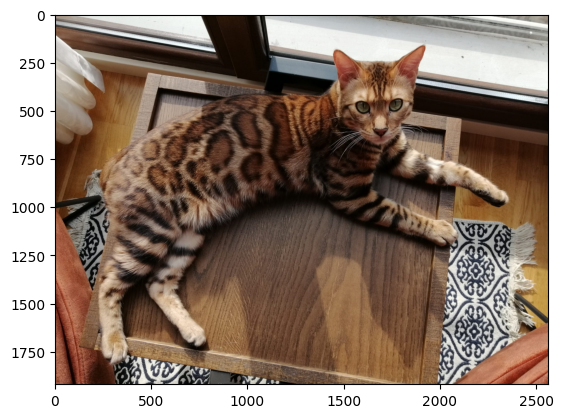

In [34]:
img = mpimg.imread(secilen_resim_yolu)
imgplot = plt.imshow(img)
plt.show()

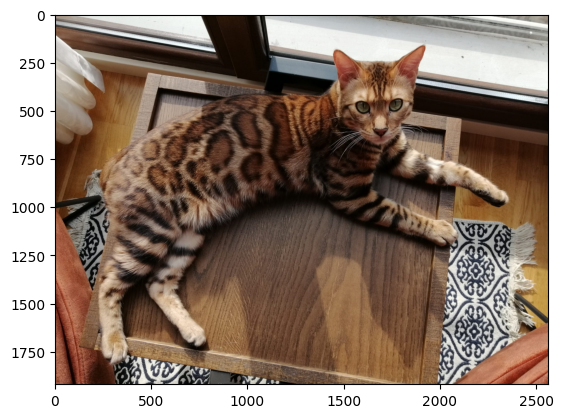

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Seçilen Resim: /content/kedi_resimleri/Bengal kedisi/Image_1.jpg
Tahmin Edilen Kedi Türü: bengal


In [36]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Modelinizi yükleyin
model = keras.models.load_model('kedi_turu_tanima_modeli.keras')

# ... (resmi_tahmin_et fonksiyonu daha önceki örnekteki gibi) ...

# Seçilen resmin yolunu belirtin
secilen_resim_yolu = "/content/kedi_resimleri/Bengal kedisi/Image_1.jpg"

# Resmi yükleyin ve gösterin
img = mpimg.imread(secilen_resim_yolu)
imgplot = plt.imshow(img)
plt.show()

# Resmi tahmin edin
tahmin = resmi_tahmin_et(secilen_resim_yolu)

# Tahmin sonucunu yorumlayın ve yazdırın
tahmin_sinifi = np.argmax(tahmin)
sinif_adlari = list(training_set.class_indices.keys())  # Sınıf adlarını training_set'ten alın
tahmin_etiketi = sinif_adlari[tahmin_sinifi]

print(f"Seçilen Resim: {secilen_resim_yolu}")
print(f"Tahmin Edilen Kedi Türü: {tahmin_etiketi}")